In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

# Questao 1

As fotografias em modo retrato se popularizaram nos ultimos anos. Elas consistem em segmentar foreground e background em uma fotografia, e borrar o background, simulando o efeito de uma camera DLSR, como na imagem abaixo.

![Imagem Abaixo](./imagem-abaixo.png)

O objetivo dessa questao e simular este efeito, usando mapas de disparidade gerados por duas imagens. Para um tutorial de como gerar mapas de disparidade usando OpenCV, veja https://docs.opencv.org/4.7.0/dd/d53/tutorial_py_depthmap.html. Apos a aquisicao do mapa de disparidade, voce deve usa-lo adequadamente para detectar o foreground, aplicar um filtro gaussiano para borrar apenas o background, e combinar as duas partes para obter um efeito como na figura acima. Experimente seu algoritmo em tres pares de imagens, em cenarios diferentes, adquiridas atraves de pequenas variacoes de ponto de vista da camera.

# Questao 2

Leia o seguinte tutorial sobre reconstrucao 3d, ate a etapa de geracao do arquivo PLY: https://medium.com/analytics-vidhya/depth-sensing-and-3d-reconstruction-512ed121aa60

## a) Experimente o codigo disponibilizado no tutorial em tres exemplos distintos, gerando a nuvem de pontos e visualizando com o Meshlab.

In [2]:
import nbimporter
import reconstruction3d

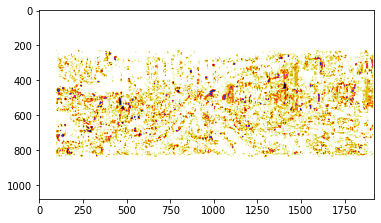

out.ply saved


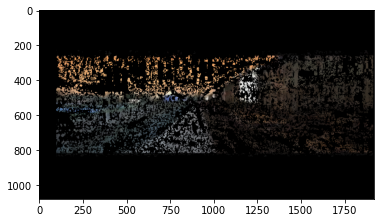

In [8]:
img_left_color = cv2.imread("./q2/2.0.jpg")
img_right_color = cv2.imread("./q2/2.1.jpg")
reconstruction3d.reconstruction3d(img_left_color, img_right_color)

### Imagens selecionadas:

| ![Imagem left](./q2/0.0.jpg) | ![Imagem right](./q2/0.1.jpg) |
|---|---|

### Resultado:

![Meshlab1](./q2/0.png)

### Imagens selecionadas:

| ![Imagem left](./q2/1.0.jpg) | ![Imagem right](./q2/1.1.jpg) |
|---|---|

### Resultado:

![Meshlab2](./q2/1.png)

### Imagens selecionadas:

| ![Imagem left](./q2/2.0.jpg) | ![Imagem right](./q2/2.1.jpg) |
|---|---|

### Resultado:

![Meshlab3](./q2/2.png)

## b) Descreva, com suas palavras, as etapas realizadas desde o fornecimento do par de imagens de entrada, ate a geracao da nuvem de pontos em formato PLY.

1. Fornecimento do par de imagens

2. Geração do mapa de disparidade utilizando StereoBM do opencv, esse mapa destaca a diferença de posição entre os pontos correspondentes nas duas imagens, dando informações sobre profundidade

3. Calibração das imagens

4. Cálculo da matriz disparidade-profundidade usando cv2.stereoRectify, a importância da matriz sendo importante para transformar o mapa de disparidade em algo tridimensional

5. Transformação para nuvem de pontos 3D usando a função cv2.reprojectImageTo3D, para converter o mapa de disparidade em uma nuvem de pontos 3D

6. Correção da nuvem de pontos

7. Extração das cores, para associar aos pontos da nuvem 3D

8. Armazenamento em PLY

# Questao 3

Usando a plataforma Kaggle, pesquise um base supervisionada de imagens que possa ser usada para treinar um classificador binario de imagens. Esta base deve conter exemplos de duas classes. Considere 70% das amostras para treino, e 30% para teste (metodo holdout).

a) Usando OpenCV, extraia descritores HOG (Histogram of Gradients), e treine um classificador SVM. Exiba a acuracia atingida no conjunto de teste e a matriz de confusao. Exiba exemplos. Obs.: note que essa abordagem  ́e semelhante ao detector Dalal-Triggs, porem aqui estamos usando-a para classificacao de imagens.

b) Agora o objetivo e treinar uma CNN. Usando a abordagem de transferencia de aprendizado (transfer learning), realize treinamentos usando modelos VGG16, ResNet50, e MobileNetV2 pre-treinados. Compare os resultados usando acuracias e matrizes de confusao. Exiba exemplos de acerto e erro.

# Questao 4

O objetivo dessa questao e criar um contador de veıculos em vıdeos de uma rodovia. Voce deve experimentar um modelo pre-treinado da YOLO v5, e um Single Shot MultiBox Detection (SSD).

## a) Estude a SSD, e descreva suas principais diferencas em relacao a YOLO v5.

### YOLO (You Only Look Once) v5:

* **Detecção em Grade Única:** O YOLO divide a imagem em uma grade única e realiza a detecção de objetos diretamente. Cada célula dessa grade gera previsões para vários bounding boxes e classes simultaneamente.

* **Treinamento Iterativo:** O YOLO passa por várias iterações de treinamento para melhorar a precisão. O treinamento iterativo é uma característica fundamental do YOLO para ajustar e refinar continuamente as previsões.

* **Backbone Network:** Utiliza uma arquitetura de rede neural convolucional como VGG16, Darknet ou CSPDarknet como sua espinha dorsal para a extração de características.

* **Aplicações Variadas:** YOLO é versátil e amplamente utilizado em diferentes domínios, desde a detecção de objetos em imagens até a segmentação de instâncias e rastreamento em vídeos.

* **Aprimoramentos em Versões Posteriores:** O YOLO tem várias versões (v1, v2, v3, v4 e v5) com melhorias progressivas, incluindo ajustes na arquitetura da rede, na precisão e na velocidade de inferência.

### Single Shot MultiBox Detection (SSD):

* **Detecção em Múltiplas Escalas:** O SSD adota uma abordagem de detecção em múltiplas escalas. Em vez de uma única grade, ele opera em várias camadas de convolução com diferentes tamanhos de caixa de ancoragem para detecção em diferentes escalas.

* **Treinamento Integrado:** O SSD realiza treinamento em uma única iteração, integrando o processo de treinamento e ajuste de pesos em uma única etapa.

* **Backbone Network:** Utiliza uma rede neural convolucional como VGG16 ou MobileNet como espinha dorsal para a extração de características.

* **Flexibilidade em Tamanhos de Bounding Box:** O SSD permite que as caixas de ancoragem tenham diferentes proporções, oferecendo flexibilidade na detecção de objetos com variados aspectos.

* **Especialização em Detecção Rápida:** O SSD é conhecido por sua eficiência em termos de velocidade de inferência, sendo uma opção atraente para aplicações que exigem detecção em tempo real.

* **Utilização em Aplicações Específicas:** O SSD é frequentemente escolhido para aplicações específicas em que a eficiência de inferência é uma consideração crucial.

### Principais Diferenças:

A principal diferença reside na abordagem de detecção. Enquanto o YOLO se concentra em uma única grade para prever bounding boxes e classes, o SSD opera em múltiplas escalas usando diferentes camadas de convolução. O treinamento iterativo do YOLO contrasta com a abordagem integrada de uma iteração do SSD. A escolha entre YOLO e SSD dependerá das necessidades específicas de uma aplicação, como a complexidade do cenário, a precisão desejada e os requisitos de velocidade.

## b) Para cada um dos dois modelos, realize as deteccoes de veıculos em cada frame do vıdeo em anexo (classroom). Gere os vıdeos com as bounding boxes detectadas.

### Yolo

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
cap = cv2.VideoCapture('./q4/bridge.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_yolo.mp4', fourcc, 30, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    for det in results.pred[0]:
        if det[-1] == 2: # veiculos
            x1, y1, x2, y2, conf = det[:5]
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    out.write(frame)
cap.release()
out.release()
cv2.destroyAllWindows()
print('Video de saida salvo')

C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\jonas/.cache\torch\hub\master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'Pillow>=9.4.0', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
   ---------------------------------------- 195.4/195.4 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 2.6/2.6 MB 33.5 MB/s eta 0:00:00
   --------------------------------------- 819.3/819.3 kB 50.6 MB/s eta 0:00:00
   ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.3.0
    Uninstalling Pillow-9.3.0:
      Successfully uninstalled Pillow-9.3.0

requirements: AutoUpdate success ✅ 9.2s, installed 3 packages: ['gitpython>=3.1.30', 'Pillow>=9.4.0', 'setuptools>=65.5.1']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5  2024-3-6 Python-3.10.11 torch-2.2.1+cpu CPU

100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Vídeo de saída salvo em output_yolo.mp4


### SSD

In [20]:
model = tf.saved_model.load('./q4/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model')

video_path = './q4/bridge.mp4'
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_ssd.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    input_tensor = tf.convert_to_tensor([frame], dtype=tf.uint8)
    detections = model(input_tensor)
    
    for i, box in enumerate(detections['detection_boxes'][0].numpy()):
        classe = int(detections['detection_classes'][0][i].numpy())
        if classe == 3: # se for um carro
            ymin, xmin, ymax, xmax = box
            xmin = int(xmin * frame.shape[1])
            xmax = int(xmax * frame.shape[1])
            ymin = int(ymin * frame.shape[0])
            ymax = int(ymax * frame.shape[0])
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    
    #plt.imshow(frame, cmap='gray')
    #plt.show()
    output_video.write(frame)

cap.release()
output_video.release()
cv2.destroyAllWindows()

## c) Para cada um dos dois modelos, plote um grafico onde o eixo horizontal e o tempo (quadro do vıdeo), e o vertical e a quantidade de carros detectada pelo modelo.

### Yolo

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
cap = cv2.VideoCapture('./q4/bridge.mp4')

qnt_frames = 0
qnt_carros = []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    qnt_carros_no_frame = 0
    for det in results.pred[0]:
        if det[-1] == 2: # veiculos
            qnt_carros_no_frame += 1
    qnt_carros.append(qnt_carros_no_frame)
    qnt_frames += 1
            
cap.release()

Using cache found in C:\Users\jonas/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-6 Python-3.10.11 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


qnt_carros = [9, 9, 9, 9, 8, 11, 10, 10, 9, 10, 11, 10, 10, 10, 10, 12, 11, 13, 13, 11, 9, 11, 11, 10, 11, 10, 11, 12, 12, 11, 11, 11, 11, 12, 11, 11, 11, 13, 11, 9, 9, 10, 10, 11, 10, 10, 11, 10, 11, 10, 11, 10, 11, 11, 10, 11, 9, 7, 9, 10, 8, 8, 11, 7, 9, 10, 9, 9, 8, 9, 6, 7, 10, 10, 11, 11, 12, 11, 9, 12, 11, 10, 13, 14, 12, 11, 11, 13, 12, 10, 11, 10, 11, 13, 14, 13, 12, 13, 13, 12, 14, 14, 12, 13, 13, 11, 11, 14, 12, 13, 15, 15, 16, 13, 15, 11, 10, 15, 15, 14, 15, 15, 17, 16, 13, 14, 13, 14, 12, 13, 17, 16, 15, 16, 15, 12, 12, 11, 12, 13, 12, 11, 11, 9, 10, 10, 14, 12, 14, 12, 15, 14, 14, 15, 13, 14, 13, 14, 16, 15, 15, 15, 15, 16, 17, 14, 15, 17, 16, 13, 11, 11, 11, 10, 12, 11, 11, 10, 9, 10, 11, 9, 9, 9, 9, 10, 10, 9, 12, 10, 10, 11, 11, 10, 10, 10, 10, 13, 12, 13, 12, 12, 14, 13, 14, 14, 15, 15, 16, 17, 14, 13, 13, 15, 15, 16, 15, 13, 14, 13, 11, 12, 12, 12, 11, 12, 13, 12, 12, 11, 10, 11, 11, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 12, 12, 13, 14, 13, 15, 14, 13, 14, 13, 15, 14, 13, 15, 14, 16, 14, 16, 13, 12, 14, 12, 13, 12, 12, 12, 12, 12, 13, 12, 13, 13, 13, 12, 12, 13, 13, 13, 15, 15, 15, 13, 14, 13, 15, 15, 17, 16, 16, 15, 15, 15, 15, 15, 16, 15, 14, 13, 14, 13, 13, 13, 11, 11, 11, 11, 11, 12, 12, 13, 15, 11, 13, 12, 13, 13, 16, 13, 12, 11, 12, 12, 11, 12, 12, 14, 13, 12, 13, 13, 11, 11, 13, 12, 13, 12, 14, 14, 12, 10, 10, 10, 8, 8, 8, 8, 9, 9, 8, 9, 9, 10, 11, 9, 12, 10, 10, 10, 11, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 10, 10, 10, 10, 9, 9, 11, 10, 9, 10, 10, 9, 9, 9, 11, 10, 10, 11, 10, 11, 9, 9, 9, 10, 10, 9, 9, 9, 9, 8, 9, 9, 12, 11, 10, 11, 11, 11, 10, 9, 11, 10, 13, 12, 12, 10, 11, 10, 10, 11, 11, 10, 10, 11, 9, 9, 9, 12, 11, 9, 10, 9, 8, 8, 7, 7, 7, 7, 9, 11, 11, 10, 10, 9, 11, 10, 10, 12, 11, 11, 11, 12, 14, 14, 15, 15, 15, 10, 12, 14, 14, 13, 13, 13, 12, 11, 11, 9, 9, 11, 8, 9, 12, 10, 8, 9, 9, 9, 9, 9, 10, 10, 9, 12, 11, 10, 13, 11, 11, 11, 9, 10, 10, 10, 11, 11, 10, 11, 12, 11, 13, 13, 11, 13, 13, 13, 13, 12, 12, 11, 12, 12, 12, 12, 12, 10, 11, 11, 11, 12, 11, 11, 11, 11, 10, 9, 11, 11, 9, 11, 9, 11, 10, 10, 10, 10, 11, 14, 15, 13, 13, 13, 15, 14, 13, 13, 11, 11, 12, 12, 11, 12, 12, 11, 11, 11, 12, 10, 12, 10, 11, 11, 11, 11, 11, 11, 14, 13, 12, 14, 13]

In [17]:
frames = np.arange(0, qnt_frames, 1)
plt.plot(frames, qnt_carros)
plt.yticks(np.arange(min(qnt_carros), max(qnt_carros) + 1, 2))
plt.show()

<img src="./q4/qnt_carros_yolo.png" alt="Imagem" style="max-width:50%; max-height:50%;">

### SSD

In [12]:
model = tf.saved_model.load('./q4/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model')
cap = cv2.VideoCapture('./q4/bridge.mp4')

qnt_frames = 0
qnt_carros = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    input_tensor = tf.convert_to_tensor([frame], dtype=tf.uint8)
    detections = model(input_tensor)
    
    qnt_carros_no_frame = 0
    for i, box in enumerate(detections['detection_boxes'][0].numpy()):
        classe = int(detections['detection_classes'][0][i].numpy())
        if classe == 3: # se for um carro
            qnt_carros_no_frame += 1
    qnt_carros.append(qnt_carros_no_frame)
    qnt_frames += 1

cap.release()

qnt_carros = [11, 11, 11, 10, 10, 7, 9, 13, 15, 15, 15, 18, 17, 19, 12, 8, 10, 11, 12, 15, 12, 12, 15, 9, 10, 14, 7, 6, 13, 9, 11, 10, 12, 14, 11, 10, 17, 15, 17, 20, 11, 8, 11, 18, 16, 16, 11, 8, 7, 6, 8, 8, 9, 10, 6, 8, 6, 4, 3, 5, 5, 6, 5, 4, 4, 6, 6, 4, 6, 8, 10, 10, 7, 6, 7, 8, 6, 6, 9, 8, 8, 10, 12, 10, 11, 7, 8, 6, 6, 10, 9, 6, 1, 3, 4, 3, 3, 4, 5, 7, 5, 4, 3, 3, 6, 6, 5, 8, 7, 6, 3, 5, 3, 4, 10, 10, 7, 8, 10, 7, 8, 6, 7, 9, 10, 4, 5, 8, 7, 10, 5, 9, 9, 6, 13, 10, 9, 7, 6, 5, 3, 7, 8, 9, 9, 8, 9, 13, 10, 12, 13, 9, 9, 7, 9, 7, 14, 5, 10, 9, 4, 4, 5, 6, 3, 1, 5, 6, 6, 5, 2, 1, 5, 6, 6, 2, 2, 3, 7, 9, 8, 6, 6, 6, 5, 5, 5, 6, 7, 6, 7, 7, 8, 12, 5, 6, 7, 9, 10, 12, 10, 8, 8, 6, 6, 5, 8, 9, 8, 11, 11, 6, 7, 9, 7, 5, 5, 10, 6, 4, 2, 3, 4, 3, 1, 2, 5, 8, 5, 7, 6, 6, 7, 8, 7, 9, 6, 7, 6, 10, 6, 6, 4, 4, 6, 6, 7, 7, 8, 7, 4, 10, 5, 1, 6, 8, 5, 3, 4, 2, 2, 6, 6, 3, 2, 7, 8, 9, 9, 7, 7, 9, 8, 8, 6, 9, 4, 4, 4, 6, 5, 5, 4, 12, 6, 7, 6, 4, 2, 3, 2, 7, 4, 7, 5, 3, 2, 2, 5, 4, 4, 3, 1, 1, 3, 2, 3, 3, 7, 3, 2, 4, 3, 9, 7, 5, 8, 6, 5, 7, 4, 5, 6, 12, 11, 8, 6, 5, 7, 7, 7, 6, 3, 3, 3, 4, 2, 2, 1, 3, 2, 2, 3, 3, 2, 3, 4, 3, 4, 2, 4, 3, 1, 1, 1, 1, 3, 4, 6, 4, 5, 6, 5, 4, 3, 4, 3, 6, 5, 4, 5, 3, 4, 7, 5, 5, 5, 4, 5, 5, 5, 5, 4, 8, 5, 5, 4, 5, 6, 6, 7, 6, 6, 5, 4, 5, 4, 6, 5, 6, 6, 6, 5, 4, 5, 5, 3, 7, 7, 4, 4, 5, 4, 5, 6, 7, 9, 6, 7, 7, 7, 7, 8, 9, 7, 7, 7, 9, 10, 8, 9, 9, 10, 9, 6, 7, 7, 6, 5, 5, 5, 7, 6, 4, 6, 7, 8, 9, 9, 10, 9, 6, 7, 4, 6, 4, 8, 6, 5, 7, 7, 7, 8, 7, 7, 9, 11, 5, 5, 7, 7, 6, 9, 3, 3, 2, 7, 9, 6, 9, 4, 4, 5, 8, 5, 4, 5, 8, 12, 9, 7, 12, 10, 10, 7, 5, 6, 7, 5, 6, 5, 6, 6, 8, 6, 5, 4, 4, 4, 3, 5, 6, 6, 6, 6, 8, 6, 6, 4, 7, 6, 6, 4, 3, 8, 7, 5, 9, 7, 6, 5, 4, 5, 5, 5, 5, 4, 4, 5, 4, 2, 2, 4, 3, 3, 1, 3, 5, 5, 6, 5, 7, 7, 7, 4, 6, 6, 6, 4, 3, 3, 5, 5, 1, 4, 4, 6, 6, 4, 3, 3, 4, 3, 4, 9, 7]

In [18]:
frames = np.arange(0, qnt_frames, 1)
plt.plot(frames, qnt_carros)
plt.yticks(np.arange(min(qnt_carros), max(qnt_carros) + 1, 2))
plt.show()

<img src="./q4/qnt_carros_ssd.png" alt="Imagem" style="max-width:50%; max-height:50%;">